# 딥러닝 라이브러리 실습: Torch의 이해 및 실습


### 실습 목표

* Torch와 nn 패키지의 이해
* 작은 Neural network 를 CPU에서 학습 및 실험

## 시작에 앞서

* Torch는 `Lua` 를 사용하여 코딩함
* `Lua`는 `Javascript`와 유사한 면을 지니며, 변수는 global이 default로, `local`이라는 키워드로 로컬변수 설정이 가능
* 1-based indexing.
* Function call `foo.bar()`는 Lua에서 `foo:bar()`로 쓰임
* Python에서의 `import`, C에서 `include` 처럼 외부 라이브러리를 포함시키는 명령어는 `require`임


## 0. Lua: 기본 사용법
#### Strings, numbers, and tables

In [ ]:
a = 'hello'

In [ ]:
print(a)

In [ ]:
b = {}

In [ ]:
b[1] = a

In [ ]:
print(b)

In [ ]:
b[2] = 30

In [ ]:
for i=1,#b do -- the # operator is the length operator in Lua
    print(b[i]) 
end

#### Tensors

In [8]:
a = torch.Tensor(5,3) -- construct a 5x3 matrix, uninitialized

In [9]:
a = torch.rand(5,3)
print(a)

 0.6571  0.1667  0.8858
 0.0547  0.6048  0.4849
 0.3794  0.5189  0.1749
 0.8338  0.9002  0.2758
 0.0220  0.6223  0.7457
[torch.DoubleTensor of size 5x3]



In [10]:
b=torch.rand(3,4)

In [11]:
-- matrix-matrix multiplication: syntax 1
a*b 

 1.1616  1.3225  0.6878  0.6795
 0.7125  0.8149  0.8241  0.5996
 0.5274  0.7661  0.6579  0.6855
 0.9630  1.4436  1.1609  1.2946
 0.9472  1.0081  0.9542  0.6328
[torch.DoubleTensor of size 5x4]



In [12]:
-- matrix-matrix multiplication: syntax 2
torch.mm(a,b) 

 1.1616  1.3225  0.6878  0.6795
 0.7125  0.8149  0.8241  0.5996
 0.5274  0.7661  0.6579  0.6855
 0.9630  1.4436  1.1609  1.2946
 0.9472  1.0081  0.9542  0.6328
[torch.DoubleTensor of size 5x4]



In [13]:
-- matrix-matrix multiplication: syntax 3
c=torch.Tensor(5,4)
c:mm(a,b) -- store the result of a*b in c

#### (Optional) CUDA Tensors
:cuda function 을 통해서 변수를 GPU로 보낼 수 있음

본 실습에서 주어진 환경은 CPU 기반으로 작동되지 않음


In [14]:
require 'cutorch';
a = a:cuda()
b = b:cuda()
c = c:cuda()
c:mm(a,b) -- done on GPU

[string "require 'cutorch';..."]:1: module 'cutorch' not found:
	no field package.preload['cutorch']
	no file '/root/.luarocks/share/lua/5.1/cutorch.lua'
	no file '/root/.luarocks/share/lua/5.1/cutorch/init.lua'
	no file '/root/torch/install/share/lua/5.1/cutorch.lua'
	no file '/root/torch/install/share/lua/5.1/cutorch/init.lua'
	no file './cutorch.lua'
	no file '/root/torch/install/share/luajit-2.1.0-beta1/cutorch.lua'
	no file '/usr/local/share/lua/5.1/cutorch.lua'
	no file '/usr/local/share/lua/5.1/cutorch/init.lua'
	no file '/root/torch/install/lib/cutorch.so'
	no file '/root/.luarocks/lib/lua/5.1/cutorch.so'
	no file '/root/torch/install/lib/lua/5.1/cutorch.so'
	no file './cutorch.so'
	no file '/usr/local/lib/lua/5.1/cutorch.so'
	no file '/usr/local/lib/lua/5.1/loadall.so'
stack traceback:
	[C]: in function 'require'
	[string "require 'cutorch';..."]:1: in main chunk
	[C]: in function 'xpcall'
	/root/torch/install/share/lua/5.1/itorch/main.lua:209: in function </root/torch/install/share/lua/5.1/itorch/main.lua:173>
	/root/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/root/torch/install/share/lua/5.1/itorch/main.lua:381: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 

#### Exercise: Add two tensors
https://github.com/torch/torch7/blob/master/doc/maths.md#res-torchaddres-tensor1-tensor2

In [6]:
function addTensors(a,b)
    return a --FIX ME
end

In [7]:
a = torch.ones(5,2)
b = torch.Tensor(2,5):fill(4)
print(addTensors(a,b))

 1  1
 1  1
 1  1
 1  1
 1  1
[torch.DoubleTensor of size 5x2]



예상 결과:

5 5

5 5

5 5

5 5

5 5

### Neural Networks
Torch 에서 Neural Net은 `nn` 이라는 패키지를 통해서 구축함

In [19]:
require 'nn';

* `module`은 Neural Net을 구성하는 기본 요소로, Layer, activation 등을 정의함
* 각 `module`은 `containers`를 이용하여 보다 복잡한 구조로 설계가 가능함

예시로, 다음과 같은 네트워크를 만들어보겠습니다.
![LeNet](http://fastml.com/images/cifar/lenet5.png)

* 위 네트워크는 Yann Lecun이 제시한 `LeNet` 이라고 불리는 네트워크로, 최근에는 `Convolutional Neural Network (CNN)` 이라는 이름으로 불림
* 간단한 feed-forward 구조를 가지며, 입력으로 이미지를 받아 일련의 레이어들의 연산을 거친 뒤 해당 이미지가 0~9중 어떤 숫자인 지 맞추는 역할을 수행함
* 이런 경우, `nn.Sequential`을 이용하여 여러 레이어를 묶을 수 있음

In [20]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(1, 6, 5, 5)) -- 1 input image channel, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

print('Lenet5\n' .. net:__tostring());

Lenet5
nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> output]
  (1): nn.SpatialConvolution(1 -> 6, 5x5)
  (2): nn.ReLU
  (3): nn.SpatialMaxPooling(2x2, 2,2)
  (4): nn.SpatialConvolution(6 -> 16, 5x5)
  (5): nn.ReLU
  (6): nn.SpatialMaxPooling(2x2, 2,2)
  (7): nn.View(400)
  (8): nn.Linear(400 -> 120)
  (9): nn.ReLU
  (10): nn.Linear(120 -> 84)
  (11): nn.ReLU
  (12): nn.Linear(84 -> 10)
  (13): nn.LogSoftMax
}	


`nn.Sequential`이외에 다른 Container 들은 다음과 같음
![containers](https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/nn_containers.png)

* Torch의 강점 중 하나는 Automatic differentiation을 지원한다는 것임
* `:forward(input)` 으로 입력에 대한 출력이 만들어지면, `:backward(input, gradient)` 가 각 neuron 에 대한 gradient를 chain rule을 이용해 계산함 

In [21]:
input = torch.rand(1,32,32) -- pass a random tensor as input to the network

In [22]:
output = net:forward(input)

In [23]:
print(output)

-2.3367
-2.2515
-2.3401
-2.2413
-2.3146
-2.3253
-2.2232
-2.3606
-2.2954
-2.3480
[torch.DoubleTensor of size 10]



In [24]:
net:zeroGradParameters() -- zero the internal gradient buffers of the network (will come to this later)

In [25]:
gradInput = net:backward(input, torch.rand(10))

In [27]:
print(#gradInput)


  1
 32
 32
[torch.LongStorage of size 3]



### Criterion: loss function 정의하기

앞서 계산한 Gradient 값은 랜덤한 숫자에 대해서 Backward 연산을 하였습니다. 

이제는, 정해진 목표에 기반해 네트워크를 학습하는 방법에 대해 알아보겠습니다. 이 때, 정해진 목표를 측정하는 방법을 __loss function__ 이라고 합니다.

__loss function__은 주어진 입력이 모델을 통과해서 나온 결과와 정답을 비교하여 측정하게 되며, 네트워크는 이를 줄여나가는 방향으로 학습하게 됩니다. 

Torch 에서는 loss function 을 이용해 neural network 를 학습할 때 automatic differentiation을 쓰고, 이는 `forward(input, target)`, `backward(input, target)`을 통해서 구현됩니다. 아래에서 loss function 을 이용한 예시를 살펴보겠습니다. 

In [28]:
criterion = nn.ClassNLLCriterion() -- a negative log-likelihood criterion for multi-class classification
criterion:forward(output, 3) -- let's say the groundtruth was class number: 3
gradients = criterion:backward(output, 3)

In [30]:
gradInput = net:backward(input, gradients)
print(gradInput)

(1,.,.) = 
 Columns 1 to 9
 0.001 *
   0.0000  0.0000  0.0064 -0.0034  0.0222 -0.0123 -0.0250 -0.1552 -0.2749
   0.0000  0.0000  0.0010  0.0025  0.0448 -0.0533 -0.1079  0.0266 -0.0638
   0.0314 -0.0342 -0.0887 -0.0558 -0.0788  0.1295 -0.1936  0.1972 -0.5158
  -0.0636 -0.0088 -0.0722  0.0245  0.2374  0.1335 -0.1191 -0.1928 -0.2319
  -0.0112  0.0547  0.1198 -0.0510  0.3496  0.2724 -0.2398 -0.2248  0.0759
   0.1714 -0.3804 -0.1301  0.1357 -0.1681  0.0385  0.0594 -0.7066 -0.6154
  -0.0862  0.2322  0.1547 -0.0085 -0.0301 -0.2508 -0.9369  1.0051 -0.2201
  -0.3127  0.2796  0.2464  0.4211 -0.1879  0.8131  0.3610  0.1312  0.0088
  -0.3618  0.0073 -0.3862  0.0051 -0.2499  0.9336 -0.1383 -0.1411  0.8883
   0.0160  0.1302 -0.2053  0.1279 -0.1254  0.0548  0.1580 -0.7327  0.7760
   0.0958  0.2201 -0.0951 -0.3289  0.5926  1.3484  0.8806  0.0399 -0.4512
   0.1015 -0.1064  0.1872  0.2620  0.2367 -0.3377  0.7931  0.2455  0.3611
   0.1760 -0.1961  0.3262 -0.3808  0.8006  0.5785 -0.1917  1.7519 -0.6935
  

6058 -2.0045  0.7628  0.3989 -0.3962
   0.0431 -1.2270  1.1281  0.2448  0.8740  0.5779 -1.3741 -0.8918  0.0632
   0.5204 -0.0664 -1.1703  0.5516  0.4615  1.2779 -0.3978 -0.7535  0.6822
  -0.6239  0.1422 -0.7252 -0.2668  0.3064 -0.0139 -0.4357 -1.5841  0.2198
  -0.0137  0.5591 -0.8692  0.2715  0.3483 -0.2814 -0.0496  0.3855 -0.4447
  -0.1166  0.0274 -0.1221  0.0528  0.3126  0.0811 -0.1265  0.6553 -0.0954
  -0.2806 -0.1834 -0.3654  0.7583  0.5998 -0.1831 -0.4696 -0.4084 -1.5565
   0.2116  0.0759  0.1503 -0.1352 -0.3760  0.4178  0.3543  0.4636  0.6674
  -0.1484  0.0002 -0.0881  0.4206 -0.0214 -0.3512  0.2263  0.4329 -0.1132
  -0.0084  0.0823 -0.0957  0.0036 -0.1772  0.2778 -0.1713  0.4491 -0.0718

Columns 19 to 27
 0.001 *
   0.0429 -0.0516  0.0297  0.0046  0.1510 -0.0801  0.2348  0.0151  0.0563
  -0.2034  0.0328 -0.0163 -0.0309 -0.1395  0.1169  0.2487  0.0142  0.1513
   0.0078 -0.0863  0.2858 -0.4961  0.2984 -0.2500 -0.1216  0.1621 -0.0773
   0.7146 -0.3406 -0.5850 -0.1363 -0.1907  0.335

9995 -0.1176 -0.1310 -0.1252  0.1268
  -0.1927  0.0007  0.1390 -0.0497 -0.2600
  -0.1046 -0.3284  0.2408  0.0828  0.0704
  -0.1751 -0.0969  0.0167  0.0165  0.0206
   0.6408  0.0376 -0.2914  0.0127 -0.0684
  -0.0108 -0.1577  0.3018  0.0038  0.0843
   0.6238 -0.2272 -0.0282  0.0077  0.0100
  -0.0317 -0.0866  0.1328  0.0000  0.0000
   0.1779 -0.0737  0.1008  0.0000  0.0000
[torch.DoubleTensor of size 1x32x32]



##### 현재까지 배운 내용
* 하나의 네트워크는 다양한 컨테이너 및 모듈로 생성 가능하며, 사용하는 컨테이너/모듈에 따라 연산도 다양해집니다.
* 네트워크는 :forward 로 입력을 받아 출력을 내보냅니다.
* Criterion은 네트워크의 loss를 의미하며, 해당 loss를 줄이는 방향으로 gradient 를 계산합니다. 
* Criterion으로부터 계산한 gradient를 이용해 net:backward를 이용해 네트워크의 파라미터들을 수정합니다. 

##### Missing details
> A neural network layer can have learnable parameters or not.

A convolution layer learns it's convolution kernels to adapt to the input data and the problem being solved.  
A max-pooling layer has no learnable parameters. It only finds the max of local windows.

A layer in torch which has learnable weights, will typically have fields .weight (and optionally, .bias)

In [27]:
m = nn.SpatialConvolution(1,3,2,2) -- learn 3 2x2 kernels
print(m.weight) -- initially, the weights are randomly initialized

(1,1,.,.) = 
  0.0609  0.0852
 -0.1986 -0.1194

(2,1,.,.) = 
  0.4351 -0.4792
 -0.2842  0.0821

(3,1,.,.) = 
  0.2197  0.3140
  0.3606 -0.1833
[torch.DoubleTensor of size 3x1x2x2]



In [28]:
print(m.bias) -- The operation in a convolution layer is: output = convolution(input,weight) + bias

-0.2446
 0.4891
 0.3018
[torch.DoubleTensor of size 3]



There are also two other important fields in a learnable layer. The gradWeight and gradBias.
The gradWeight accumulates the gradients w.r.t. each weight in the layer, and the gradBias, w.r.t. each bias in the layer.

#### Training the network

For the network to adjust itself, it typically does this operation (if you do Stochastic Gradient Descent):
> weight = weight + learningRate * gradWeight [equation 1]

This update over time will adjust the network weights such that the output loss is decreasing.

Okay, now it is time to discuss one missing piece. Who visits each layer in your neural network and updates the weight according to Equation 1?

There are multiple answers, but we will use the simplest answer.  
We shall use the simple SGD trainer shipped with the neural network module: [__nn.StochasticGradient__](https://github.com/torch/nn/blob/master/doc/training.md#stochasticgradientmodule-criterion).

It has a function :train(dataset) that takes a given dataset and simply trains your network by showing different samples from your dataset to the network.

### What about data?
Generally, when you have to deal with image, text, audio or video data, you can use standard functions like: [__image.load__](https://github.com/torch/image#res-imageloadfilename-depth-tensortype) or [__audio.load__](https://github.com/soumith/lua---audio#usage) to load your data into a _torch.Tensor_ or a Lua table, as convenient.

Let us now use some simple data to train our network.

We shall use the CIFAR-10 dataset, which has the classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.  
The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.
![CIFAR-10 image](https://raw.githubusercontent.com/soumith/ex/gh-pages/assets/cifar10.png)

The dataset has 50,000 training images and 10,000 test images in total.

__We now have 5 steps left to do in training our first torch neural network__
1. Load and normalize data
2. Define Neural Network
3. Define Loss function
4. Train network on training data
5. Test network on test data.

__1. Load and normalize data__

Today, in the interest of time, we prepared the data before-hand into a 4D torch ByteTensor of size 50000x3x32x32 (training) and 10000x3x32x32 (testing)
Let us load the data and inspect it.

In [29]:
require 'paths'
if (not paths.filep("cifar10torchsmall.zip")) then
    os.execute('wget -c https://s3.amazonaws.com/torch7/data/cifar10torchsmall.zip')
    os.execute('unzip cifar10torchsmall.zip')
end
trainset = torch.load('cifar10-train.t7')
testset = torch.load('cifar10-test.t7')
classes = {'airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

In [30]:
print(trainset)

{
  data : ByteTensor - size: 10000x3x32x32
  label : ByteTensor - size: 10000
}


In [31]:
print(#trainset.data)

 10000
     3
    32
    32
[torch.LongStorage of size 4]



For fun, let us display an image:

automobile	


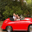

In [32]:
itorch.image(trainset.data[100]) -- display the 100-th image in dataset
print(classes[trainset.label[100]])

Now, to prepare the dataset to be used with __nn.StochasticGradient__, a couple of things have to be done according to it's [documentation](https://github.com/torch/nn/blob/master/doc/training.md#traindataset).
1. The dataset has to have a :size() function.
2. The dataset has to have a [i] index operator, so that dataset[i] returns the ith sample in the datset.

Both can be done quickly:

In [33]:
-- ignore setmetatable for now, it is a feature beyond the scope of this tutorial. It sets the index operator.
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);
trainset.data = trainset.data:double() -- convert the data from a ByteTensor to a DoubleTensor.

function trainset:size() 
    return self.data:size(1) 
end

In [34]:
print(trainset:size()) -- just to test

10000	


{
  1 : DoubleTensor - size: 3x32x32
  2 : 2
}


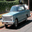

In [35]:
print(trainset[33]) -- load sample number 33.
itorch.image(trainset[33][1])

__One of the most important things you can do in conditioning your data (in general in data-science or machine learning) is to make your data to have a mean of 0.0 and standard-deviation of 1.0.__

Let us do that as a final step of our data processing.

To do this, we introduce you to the tensor indexing operator.
It is shown by example:

In [36]:
redChannel = trainset.data[{ {}, {1}, {}, {}  }] -- this picks {all images, 1st channel, all vertical pixels, all horizontal pixels}

In [37]:
print(#redChannel)

 10000
     1
    32
    32
[torch.LongStorage of size 4]



In this indexing operator, you initally start with ___[{ }]___. You can pick all elements in a dimension using ___{}___ or pick a particular element using ___{i}___ where ___i___ is the element index. You can also pick a range of elements using ___{i1, i2}___, for example ___{3,5}___ gives us the 3,4,5 elements.

__Exercise: Select the 150th to 300th data elements of the data__

In [38]:
-- TODO: fill

Moving back to mean-subtraction and standard-deviation based scaling, doing this operation is simple, using the indexing operator that we learnt above:

In [39]:
mean = {} -- store the mean, to normalize the test set in the future
stdv  = {} -- store the standard-deviation for the future
for i=1,3 do -- over each image channel
    mean[i] = trainset.data[{ {}, {i}, {}, {}  }]:mean() -- mean estimation
    print('Channel ' .. i .. ', Mean: ' .. mean[i])
    trainset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction
    
    stdv[i] = trainset.data[{ {}, {i}, {}, {}  }]:std() -- std estimation
    print('Channel ' .. i .. ', Standard Deviation: ' .. stdv[i])
    trainset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end

Channel 1, Mean: 125.83175029297	


Channel 1, Standard Deviation: 63.143400842609	


Channel 2, Mean: 123.26066621094	


Channel 2, Standard Deviation: 62.369209019002	


Channel 3, Mean: 114.03068681641	


Channel 3, Standard Deviation: 66.965808411114	


As you notice, our training data is now normalized and ready to be used.

__ 2. Time to define our neural network__


**Exercise:** Copy the neural network from the __Neural Networks__ section above and modify it to take 3-channel images (instead of 1-channel images as it was defined).  
Hint: You only have to change the first layer, change the number 1 to be 3.

__Solution:__

In [38]:
net = nn.Sequential()
net:add(nn.SpatialConvolution(3, 6, 5, 5)) -- 3 input image channels, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*5))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*5, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 10))                   -- 10 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

__3. Let us define the Loss function__

Let us use a Log-likelihood classification loss. It is well suited for most classification problems.

In [39]:
criterion = nn.ClassNLLCriterion()

__4. Train the neural network__

This is when things start to get interesting.  
Let us first define an __nn.StochasticGradient__ object. Then we will give our dataset to this object's ___:train___ function, and that will get the ball rolling.

In [40]:
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- just do 5 epochs of training.

In [41]:
nn

{
  VolumetricMaxUnpooling : table: 0x40701818
  ConcatTable : table: 0x4070ae18
  MV : table: 0x41014208
  SpatialAveragePooling : table: 0x407a1048
  SpatialConvolutionMM : table: 0x4078e150
  Reshape : table: 0x40d52bb8
  Jacobian : 
    {
      forward : function: 0x4101c458
      testAllUpdate : function: 0x4101c5d8
      testDiagHessianInput : function: 0x4101c558
      testDiagHessianWeight : function: 0x4101c578
      testDiagHessianBias : function: 0x4101c598
      testDiagHessian : function: 0x4101c538
      testJacobian : function: 0x4101c4d8
      testIO : function: 0x4101c5b8
      testJacobianUpdateParameters : function: 0x4101c518
      backwardDiagHessian : function: 0x4101c478
      testJacobianParameters : function: 0x4101c4f8
      backwardUpdate : function: 0x4101c438
      forwardUpdate : function: 0x4101c4b8
      backward : function: 0x4101c3e0
      linearModuleDiagHessian : function: 0x4101c498
    }
  SparseLinear : table: 0x41f29df8
  SoftMarginCriterion : ta

 TemporalConvolution : table: 0x407a3500
  PairwiseDistance : table: 0x407ed8f8
  WeightedMSECriterion : table: 0x41007200
  SmoothL1Criterion : table: 0x418e5538
  TemporalSubSampling : table: 0x407a4200
  PartialLinear : table: 0x41e6bd10
  TanhShrink : table: 0x41e367b0
  MixtureTable : table: 0x407143d8
  MSECriterion : table: 0x418e3dd0
  LogSoftMax : table: 0x41e2dd00
  Identity : table: 0x40719e88
  Exp : table: 0x4199bd98
  Add : table: 0x419959d8
  SpatialConvolutionLocal : table: 0x41795c38
  Squeeze : table: 0x4004eb18
  AbsCriterion : table: 0x418e99e0
  MultiCriterion : table: 0x418f2468
  Max : table: 0x418dc500
  MulConstant : table: 0x41e74b50
  NarrowTable : table: 0x40718c98
  View : table: 0x40f87768
  VolumetricConvolution : table: 0x402ba798
  SpatialSubSampling : table: 0x40794558
  HardTanh : table: 0x41e29ef8
  DistKLDivCriterion : table: 0x418f0938
  SplitTable : table: 0x4070c120
  DotProduct : table: 0x407f2030
  HingeEmbeddingCriterion : table: 0x418f6a88
  

  HardShrink : table: 0x4177adb8
  Abs : table: 0x41e37a08
  SparseJacobian : 
    {
      forward : function: 0x41020d60
      testJacobian : function: 0x41020da0
      testIO : function: 0x41020e00
      testAllUpdate : function: 0x41020e20
      testJacobianParameters : function: 0x41020dc0
      testJacobianUpdateParameters : function: 0x41020de0
      forwardUpdate : function: 0x41020d80
      backward : function: 0x41020ce8
      backwardUpdate : function: 0x41020d40
    }
  SoftMin : table: 0x41e31710
  WeightedEuclidean : table: 0x41f3bab8
  VolumetricBatchNormalization : table: 0x407045e8
  ClassSimplexCriterion : table: 0x418eed08
  Contiguous : table: 0x4199ceb0
  FlattenTable : table: 0x407171a8
  PReLU : table: 0x41780ec0
  utils : 
    {
      contiguousView : function: 0x415845e0
      recursiveType : function: 0x41996e20
      recursiveCopy : function: 0x415844d8
      recursiveResizeAs : function: 0x40d5e298
      recursiveAdd : function: 0x40d5e260
      clear : funct

  Sum : table: 0x41a1c128
  SoftSign : table: 0x41e341d0
  CSubTable : table: 0x41e71808
  SpatialUpSamplingNearest : table: 0x402b5c30
  Mul : table: 0x41e75f68
  AddConstant : table: 0x4157fa28
  Tanh : table: 0x41e353c0
  Replicate : table: 0x41e6b110
  BatchNormalization : table: 0x41e6d660
  Select : table: 0x40d556a8
  SpatialLPPooling : table: 0x4079e648
  Sigmoid : table: 0x41e2f018
  GradientReversal : table: 0x40d60328
  SpatialConvolution : table: 0x41790270
  Criterion : table: 0x418e2318
  SpatialConvolutionMap : table: 0x407926a0
  ReLU : table: 0x4177f108
  SpatialFullConvolutionMap : table: 0x4078a110
  tables : 
    {
      full : function: 0x40792768
      oneToOne : function: 0x40792788
      random : function: 0x407927a8
    }
  SpatialMaxUnpooling : table: 0x407990a0
  SpatialFullConvolution : table: 0x41e2b1f8
  Transpose : table: 0x41f247e8
  RReLU : table: 0x41785518
  SpatialZeroPadding : table: 0x402b05b0
  Min : table: 0x40d5f9e8
  Narrow : table: 0x419a40e8


In [ ]:
trainer:train(trainset)

# StochasticGradient: training	


__5. Test the network, print accuracy__

We have trained the network for 2 passes over the training dataset.  
But we need to check if the network has learnt anything at all.  
We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

In [ ]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])

Now that we are done with that, let us normalize the test data with the mean and standard-deviation from the training data.

In [ ]:
testset.data = testset.data:double()   -- convert from Byte tensor to Double tensor
for i=1,3 do -- over each image channel
    testset.data[{ {}, {i}, {}, {}  }]:add(-mean[i]) -- mean subtraction    
    testset.data[{ {}, {i}, {}, {}  }]:div(stdv[i]) -- std scaling
end

In [ ]:
-- for fun, print the mean and standard-deviation of example-100
horse = testset.data[100]
print(horse:mean(), horse:std())

Okay, now let us see what the neural network thinks these examples above are:

In [ ]:
print(classes[testset.label[100]])
itorch.image(testset.data[100])
predicted = net:forward(testset.data[100])

In [ ]:
-- the output of the network is Log-Probabilities. To convert them to probabilities, you have to take e^x 
print(predicted:exp())

You can see the network predictions. The network assigned a probability to each classes, given the image.

To make it clearer, let us tag each probability with it's class-name:

In [ ]:
for i=1,predicted:size(1) do
    print(classes[i], predicted[i])
end

Alright, fine. One single example sucked, but how many in total seem to be correct over the test set?

In [ ]:
correct = 0
for i=1,10000 do
    local groundtruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- true means sort in descending order
    if groundtruth == indices[1] then
        correct = correct + 1
    end
end

In [ ]:
print(correct, 100*correct/10000 .. ' % ')

That looks waaay better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [ ]:
class_performance = {0, 0, 0, 0, 0, 0, 0, 0, 0, 0}
for i=1,10000 do
    local groundtruth = testset.label[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- true means sort in descending order
    if groundtruth == indices[1] then
        class_performance[groundtruth] = class_performance[groundtruth] + 1
    end
end

In [ ]:
for i=1,#classes do
    print(classes[i], 100*class_performance[i]/1000 .. ' %')
end

Okay, so what next? How do we run this neural network on GPUs?

#### cunn: neural networks on GPUs using CUDA

In [ ]:
require 'cunn';

The idea is pretty simple. Take a neural network, and transfer it over to GPU:

In [ ]:
net = net:cuda()

Also, transfer the criterion to GPU:

In [ ]:
criterion = criterion:cuda()

Ok, now the data:

In [ ]:
trainset.data = trainset.data:cuda()
trainset.label = trainset.label:cuda()

Okay, let's train on GPU :) #sosimple

In [ ]:
trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 5 -- just do 5 epochs of training.

In [ ]:
trainer:train(trainset)

Why dont I notice MASSIVE speedup compared to CPU?
Because your network is realllly small. 

**Exercise:** Try increasing the size of your network (argument 1 and 2 of nn.SpatialConvolution(...), see what kind of speedup you get.

**Goals achieved:**
* Understand torch and the neural networks package at a high-level.
* Train a small neural network on CPU and GPU

### Where do I go next?

* Build crazy graphs of networks: https://github.com/torch/nngraph
* Train on imagenet with multiple GPUs: https://github.com/soumith/imagenet-multiGPU.torch
* Train recurrent networks with LSTM on text: https://github.com/wojzaremba/lstm

* More demos and tutorials: https://github.com/torch/torch7/wiki/Cheatsheet

* Chat with developers of Torch: http://gitter.im/torch/torch7
* Ask for help: http://groups.google.com/forum/#!forum/torch7
